In [315]:
import pandas as pd
import numpy as np


from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

## Preparação dos dados

In [105]:
data = pd.read_csv("eleicoes_2006_a_2010.csv")

print(data.shape)
print(data.columns)

(7330, 23)
Index(['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',
       'estado_civil', 'ocupacao', 'votos'],
      dtype='object')


In [106]:
data.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [107]:
data.tail()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
7325,2010,270000000264,ROBERTO PEREIRA URBANO,TO,PSC,3,3,3370.00,1123.333333,370.00,...,16,16,3363.41,210.213125,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
7326,2010,270000000265,RONALDO DIMAS NOGUEIRA PEREIRA,TO,PR,715,706,1034323.16,1465.046969,211804.58,...,1658,1275,815638.26,639.716282,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
7327,2010,270000000266,SÉRGIO PERIN,TO,PTB,2,2,2600.00,1300.000000,NaN,...,2,2,2600.00,1300.000000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20
7328,2010,270000000267,ÍTALO MARCEL COSTA CONCEIÇÃO,TO,PR,2,2,5175.00,2587.500000,3375.00,...,2,2,5175.00,2587.500000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BANCÁRIO E ECONOMIÁRIO,293
7329,2010,270000000501,LEONAM XAVIER GOMES,TO,PPS,13,12,33852.82,2821.068333,30083.67,...,47,46,36739.62,798.687391,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,1248


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 23 columns):
ano                                      7330 non-null int64
sequencial_candidato                     7330 non-null int64
nome                                     7330 non-null object
uf                                       7330 non-null object
partido                                  7330 non-null object
quantidade_doacoes                       7330 non-null int64
quantidade_doadores                      7330 non-null int64
total_receita                            7169 non-null float64
media_receita                            7169 non-null float64
recursos_de_outros_candidatos/comites    4940 non-null float64
recursos_de_pessoas_fisicas              4647 non-null float64
recursos_de_pessoas_juridicas            3354 non-null float64
recursos_proprios                        4942 non-null float64
quantidade_despesas                      7330 non-null int64
quantidade_fornecedores 

In [109]:
data_test = pd.read_csv("eleicoes_2014.csv")

print(data_test.shape)
print(data_test.columns)

(4936, 23)
Index(['ano', 'sq_candidato', 'nome_candidato', 'sigla_uf', 'sigla_partido',
       'qtd_doacoes', 'qtd_doadores', 'total_receita', 'media_receita',
       'recursos de outros candidatos/comitês', 'recursos de pessoas físicas',
       'recursos de pessoas jurídicas', 'recursos próprios', 'qtd_despesas',
       'qtd_fornecedores', 'total_despesa', 'media_despesa', 'descricao_cargo',
       'sexo', 'grau_instrucao', 'estado_civil', 'descricao_ocupacao',
       'votos'],
      dtype='object')


#### Algumas features estão com nomes diferentes nos dataset de treino e de teste, então iremos igualar.

In [110]:
data_test.columns = ['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',
       'estado_civil', 'ocupacao', 'votos']

print(data.columns)
print(data_test.columns)

Index(['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',
       'estado_civil', 'ocupacao', 'votos'],
      dtype='object')
Index(['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos/comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'quantidade_despesas', 'quantidade_fornecedores',
       'total_despesa', 'media_despesa', 'cargo', 'sexo', 'grau',
       'estado_civil', 'ocupacao', 'votos'],
      dtype='object')


In [111]:
data_test.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,...,145,139,326869.78,2351.581151,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.114483,39122.32,...,136,121,241016.07,1991.868347,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO,9896
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,711083.00,4870.431507,10000.00,...,518,354,567401.15,1602.828107,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,20876


#### Os dataset serão unidos para que a preparação ocorra de forma uniforme nos dois datasets

In [112]:
all_data = pd.concat([data, data_test], sort = False)

print(all_data.shape)

(12266, 23)


#### Serão excluídas as variáveis categóricas 'sequencial_candidato', 'nome', 'cargo', 'grau', 'estado_civil' e 'ocupacao'

In [113]:
all_data = all_data.drop(columns = ['sequencial_candidato', 'nome', 'cargo', 'estado_civil', 'ocupacao'], axis = 1)

print(all_data.shape)

(12266, 18)


In [114]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12266 entries, 0 to 4935
Data columns (total 18 columns):
ano                                      12266 non-null int64
uf                                       12266 non-null object
partido                                  12266 non-null object
quantidade_doacoes                       12266 non-null int64
quantidade_doadores                      12266 non-null int64
total_receita                            12105 non-null float64
media_receita                            12105 non-null float64
recursos_de_outros_candidatos/comites    8131 non-null float64
recursos_de_pessoas_fisicas              8374 non-null float64
recursos_de_pessoas_juridicas            5068 non-null float64
recursos_proprios                        7802 non-null float64
quantidade_despesas                      12266 non-null int64
quantidade_fornecedores                  12266 non-null int64
total_despesa                            12266 non-null float64
media_despes

#### Amostragem dos valores numéricos

In [115]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

In [116]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index # pegando todos os valores númericos

numeric_feats = numeric_feats[numeric_feats != 'ano'] # ano não será normalizados

print(numeric_feats.shape)
print(numeric_feats.values)

(13,)
['quantidade_doacoes' 'quantidade_doadores' 'total_receita'
 'media_receita' 'recursos_de_outros_candidatos/comites'
 'recursos_de_pessoas_fisicas' 'recursos_de_pessoas_juridicas'
 'recursos_proprios' 'quantidade_despesas' 'quantidade_fornecedores'
 'total_despesa' 'media_despesa' 'votos']


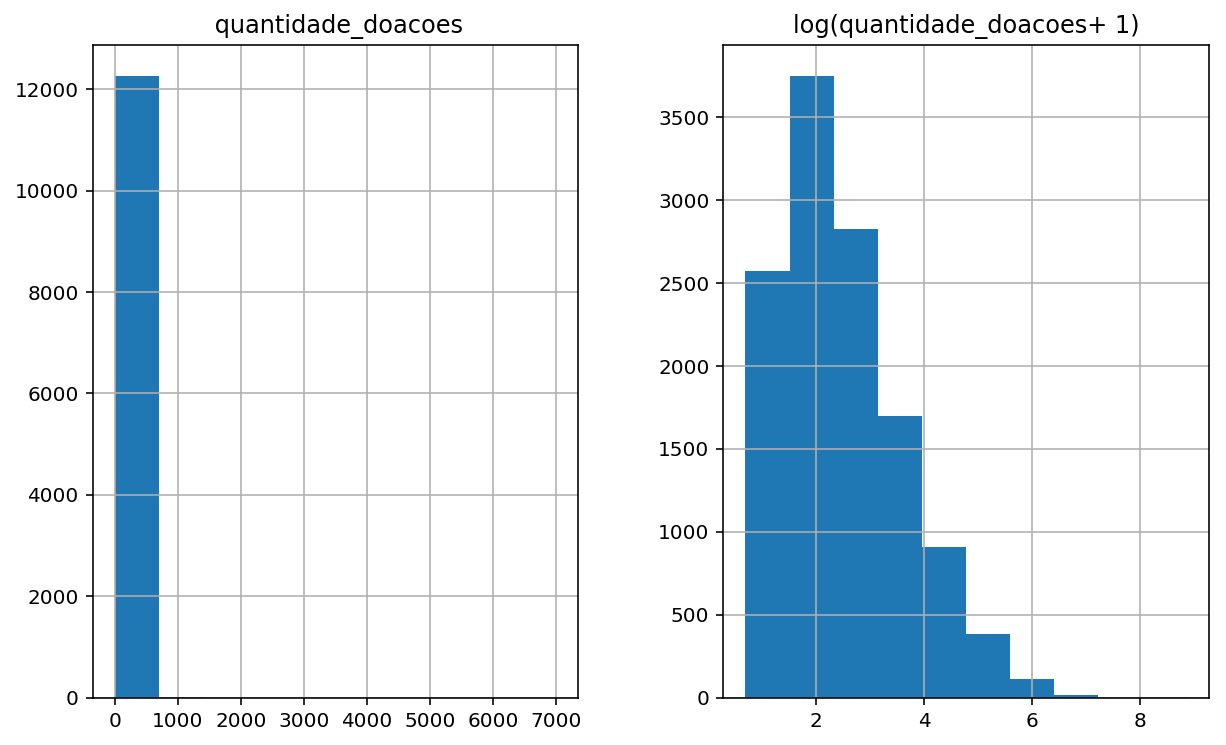

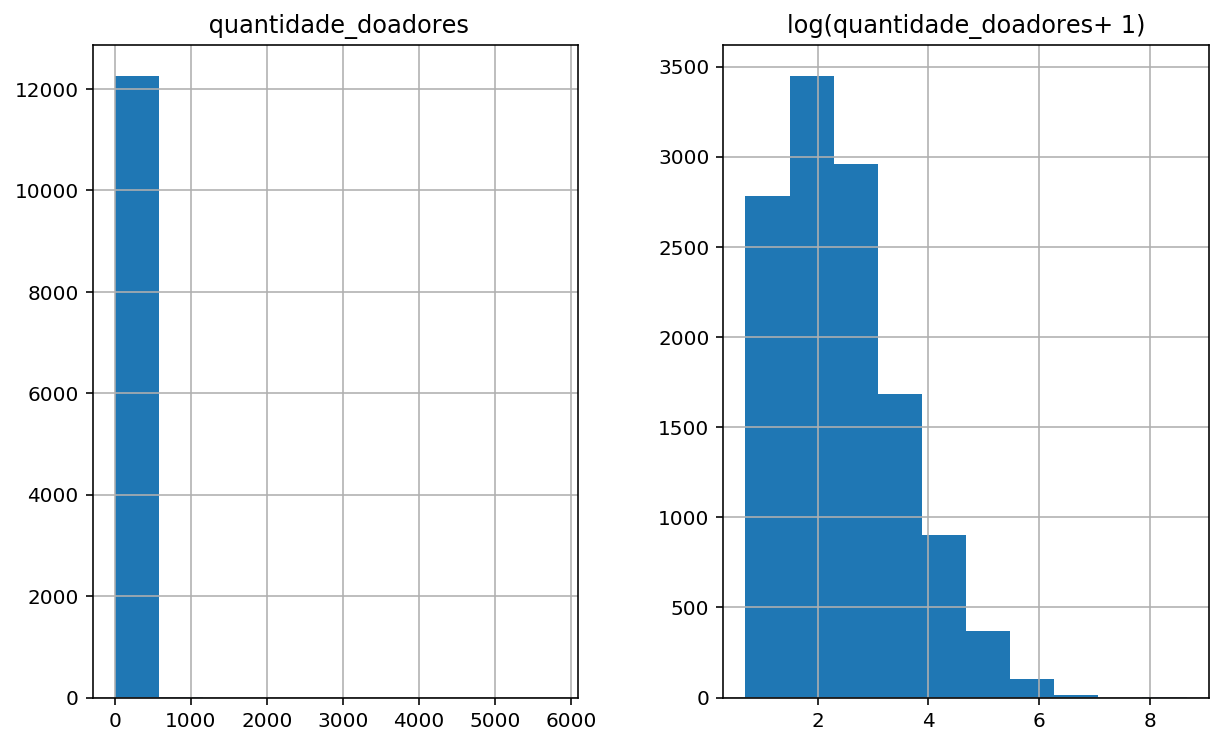

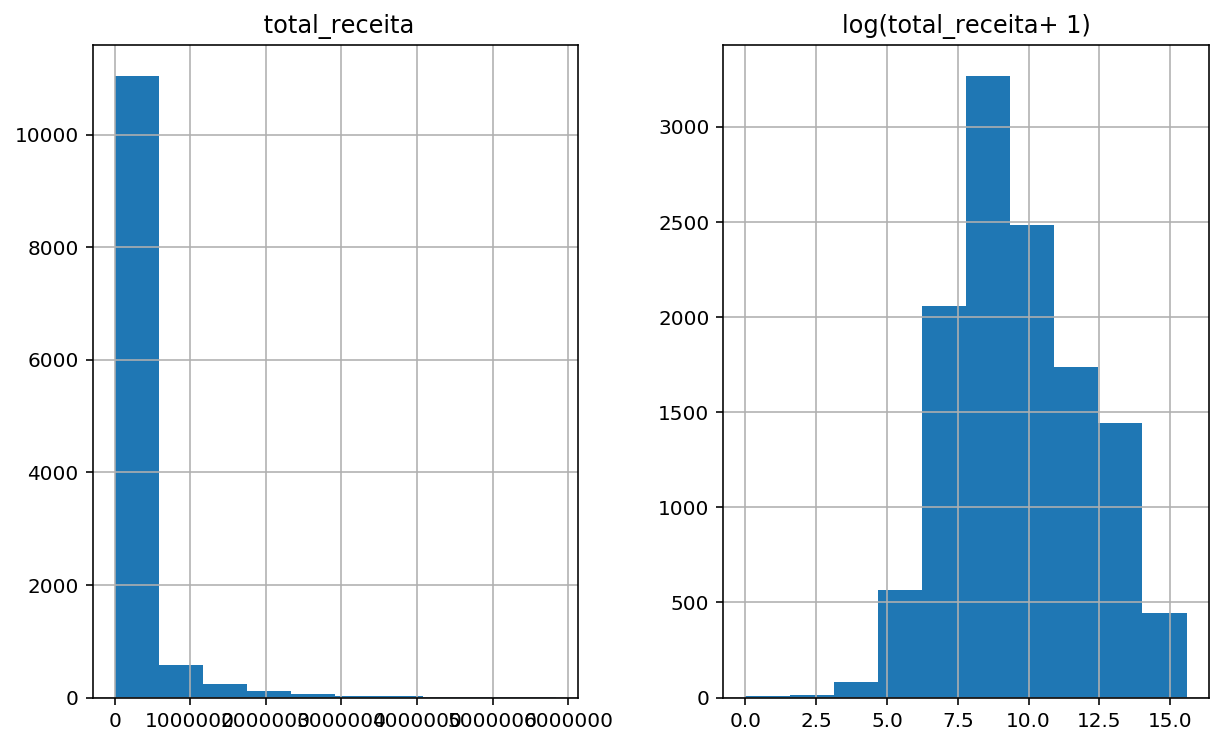

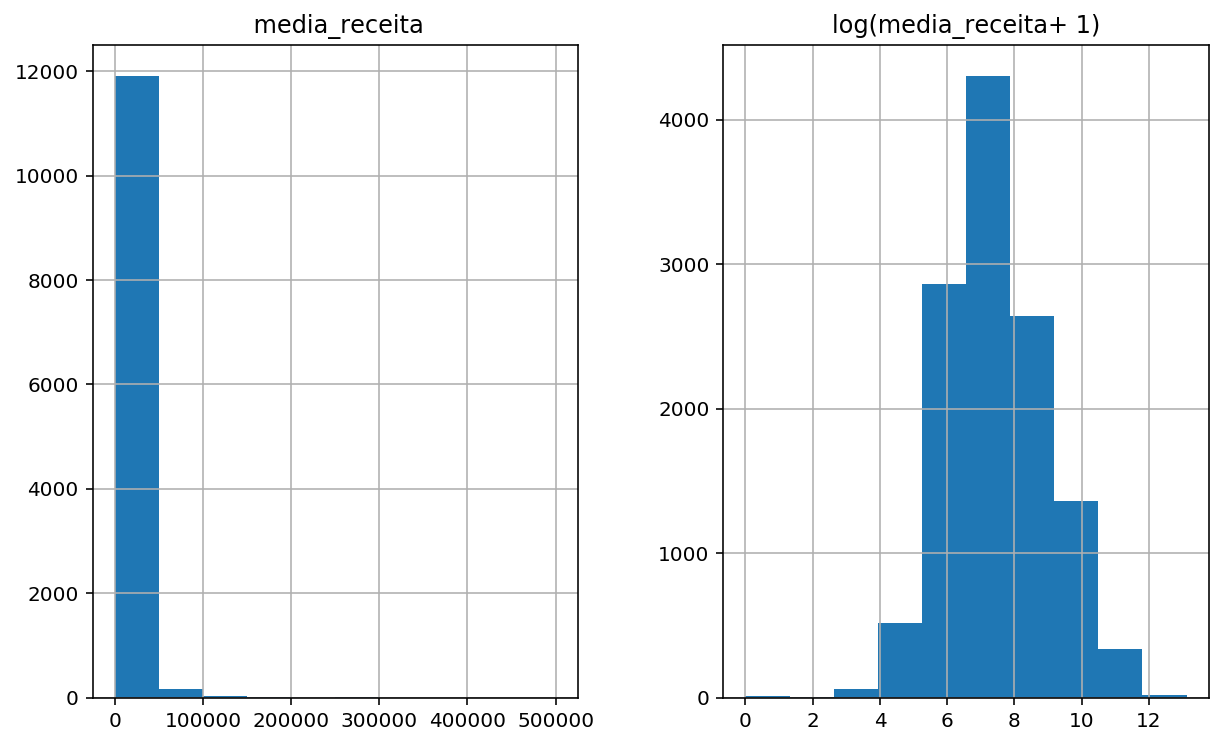

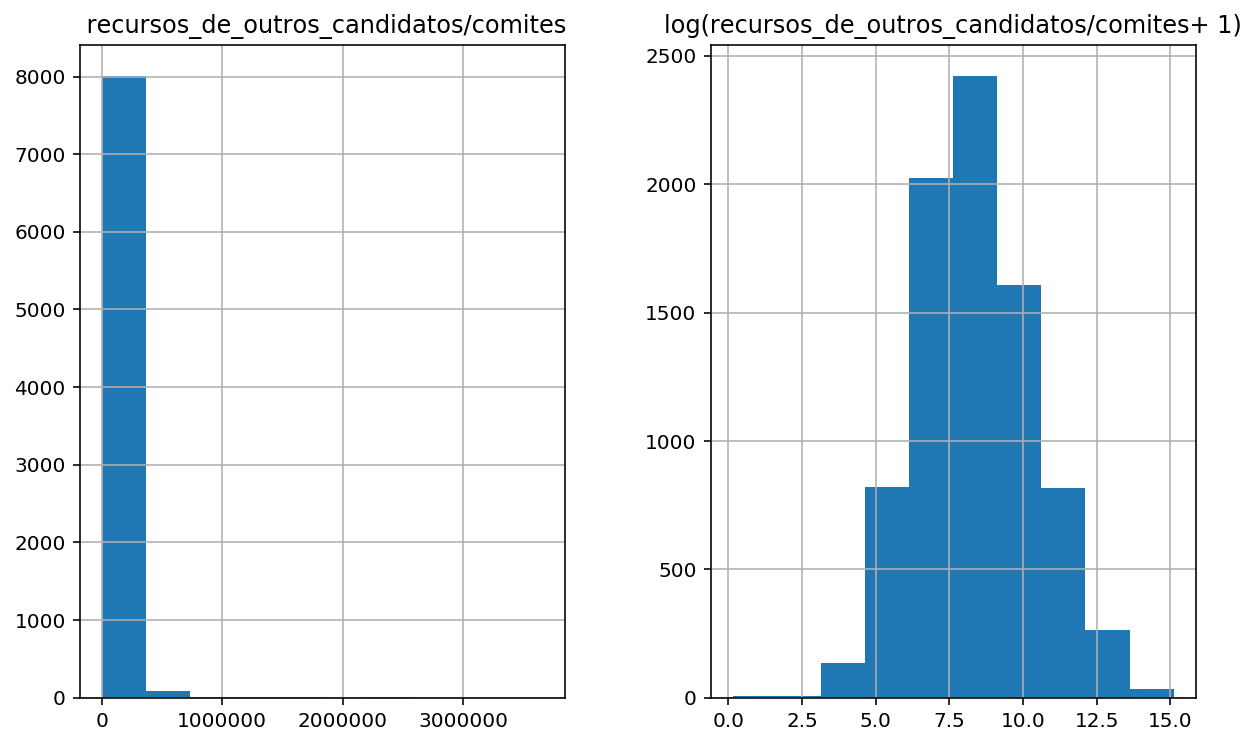

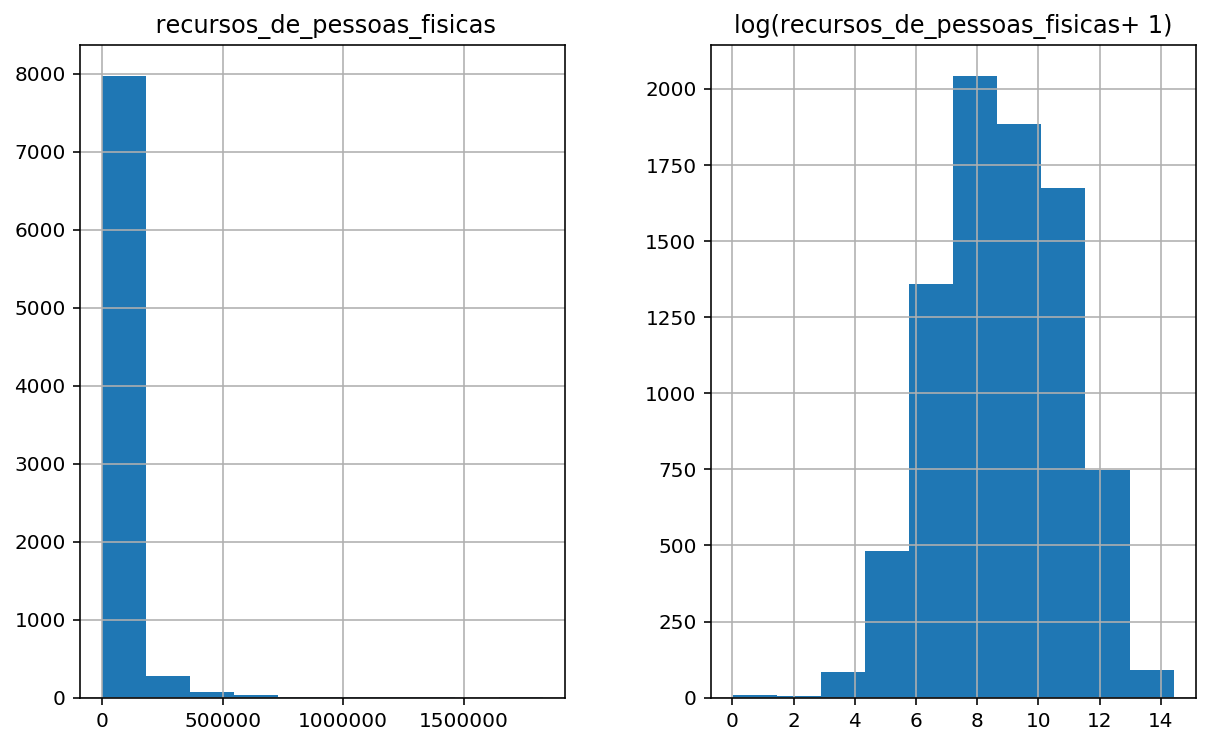

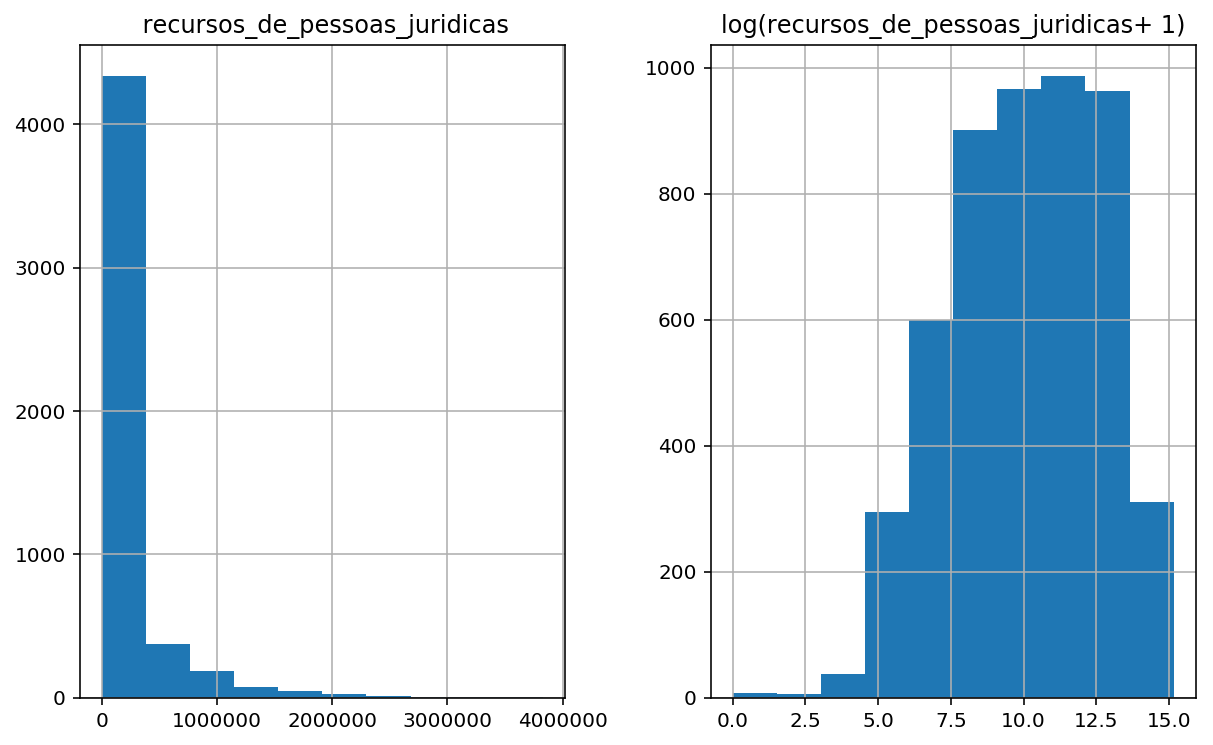

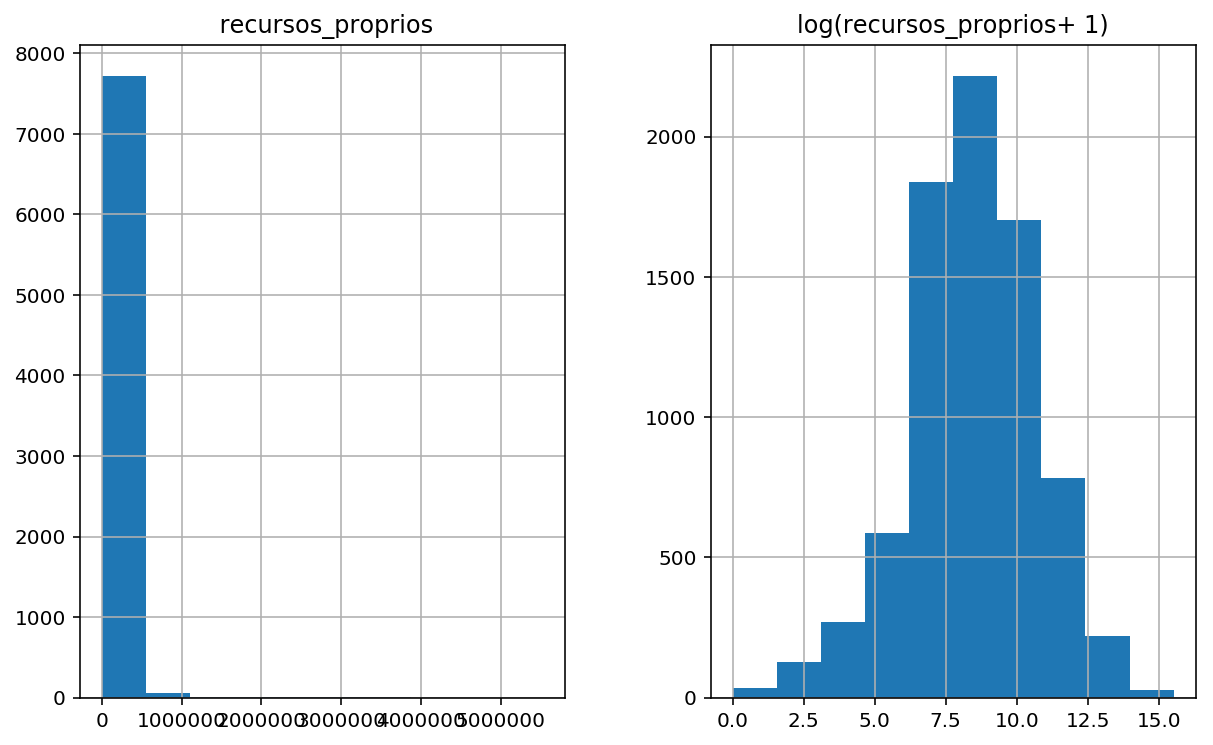

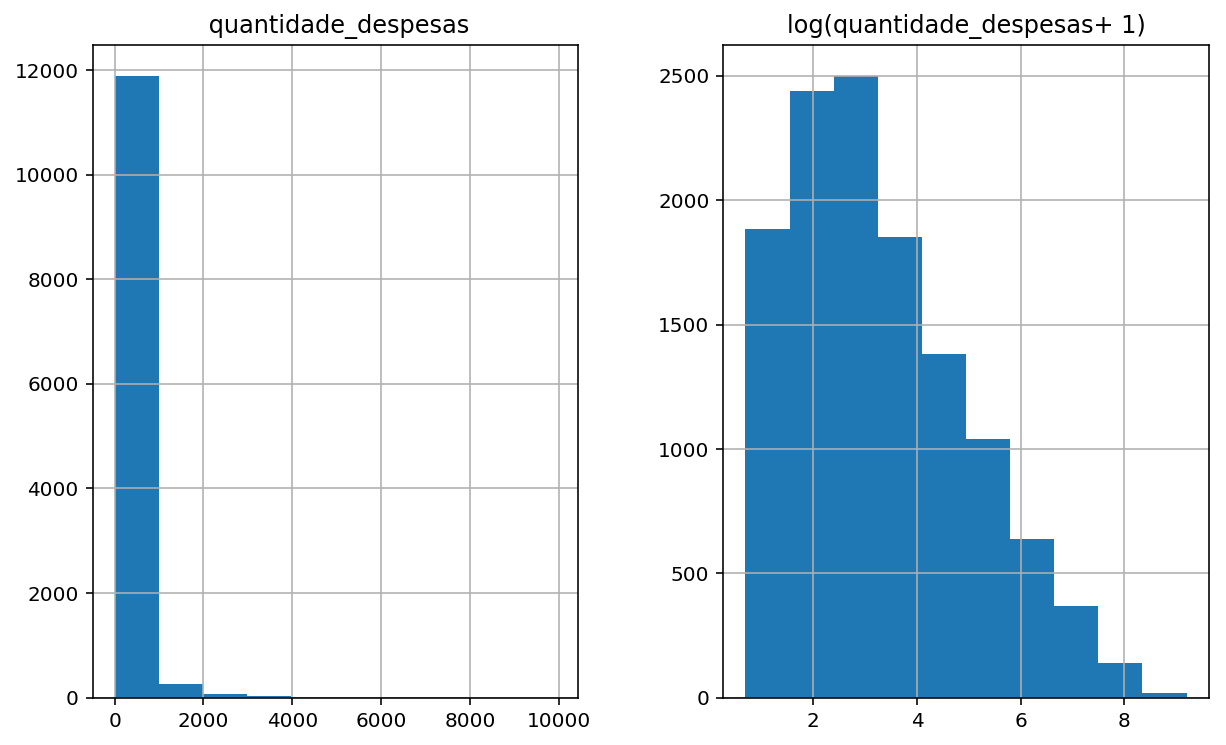

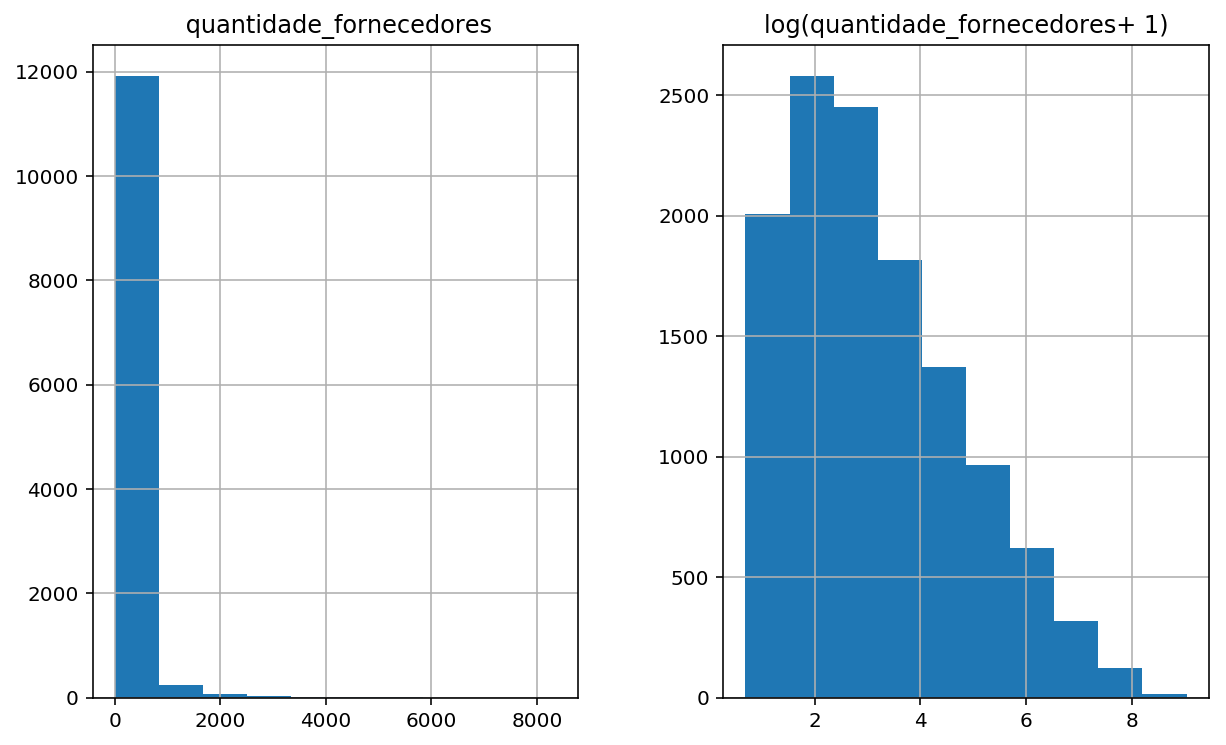

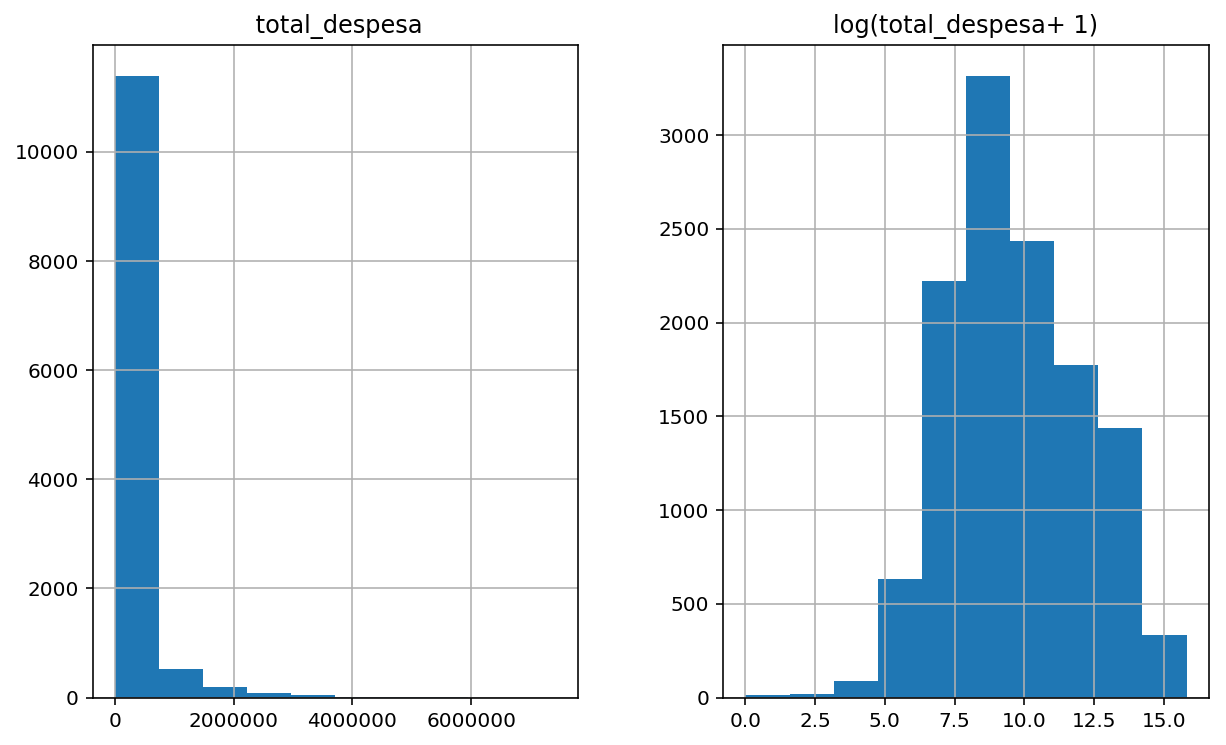

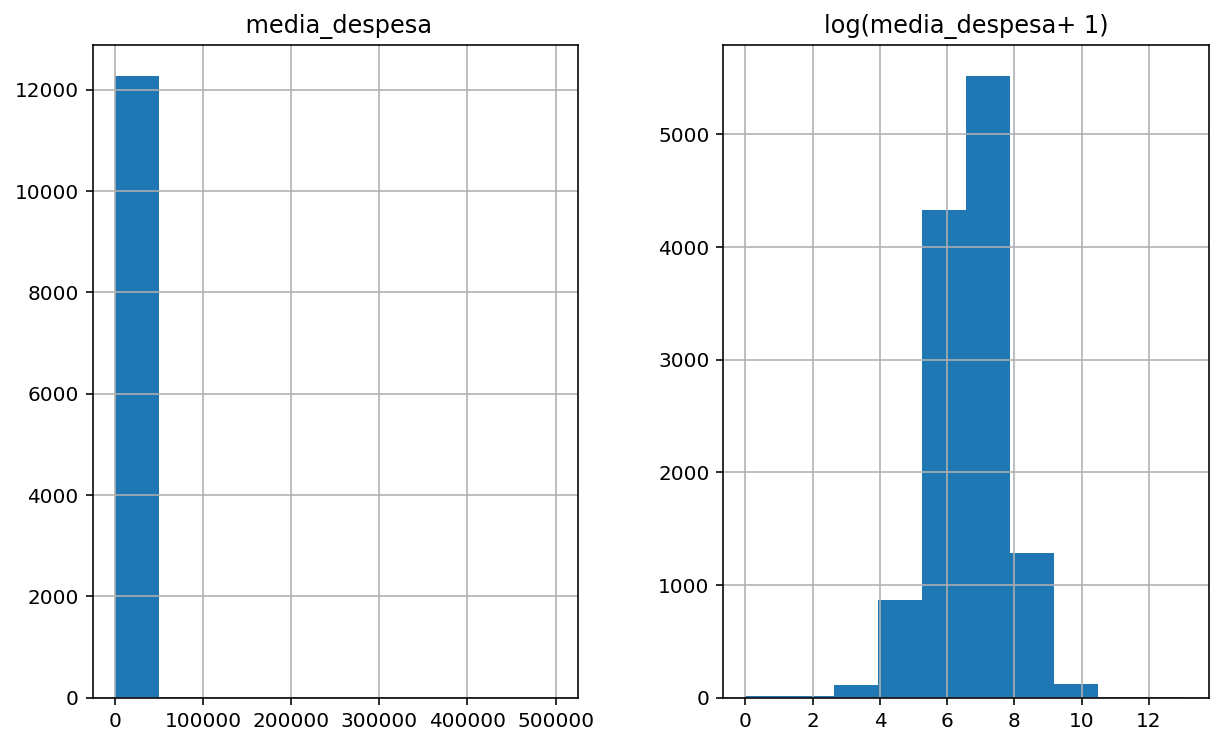

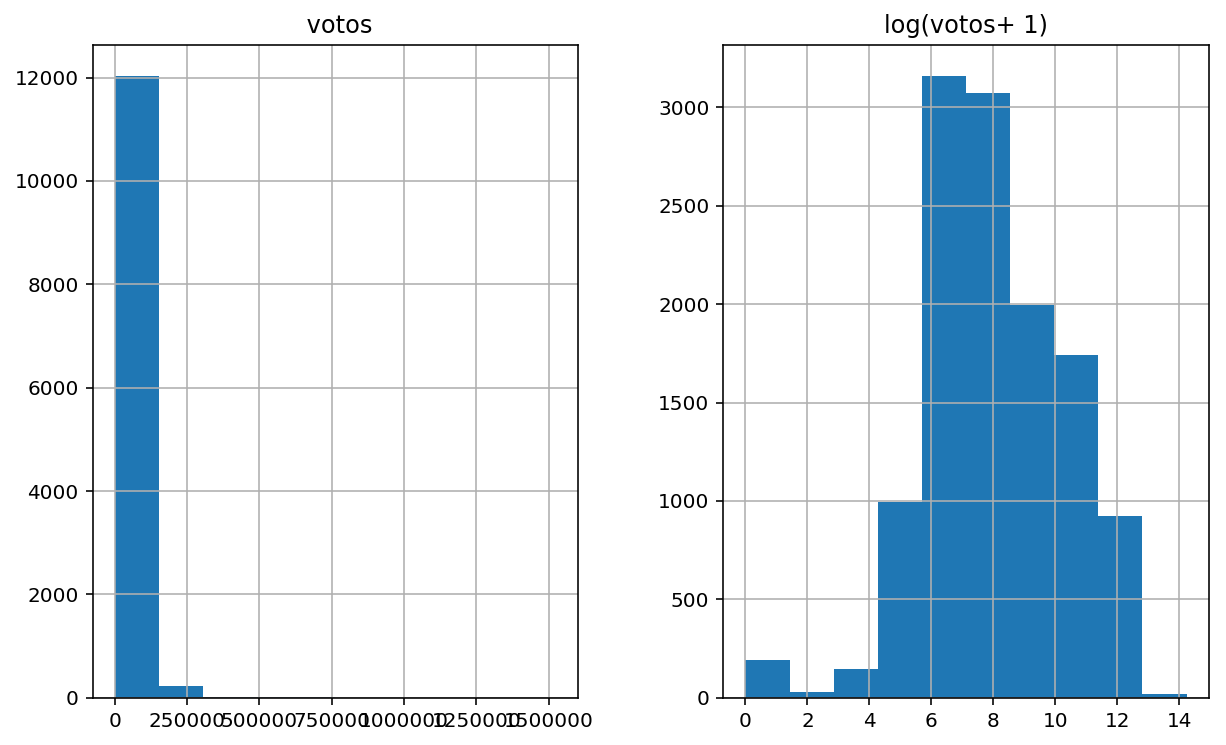

In [117]:
for f in numeric_feats:
    plot = pd.DataFrame({"log(" + f + "+ 1)":np.log1p(all_data[f]), " " + f:all_data[f]})
    plot.hist()

#### Normalização dos valores enviesados

In [118]:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [121]:
print(all_data.shape)

all_data.head()

(12266, 18)


,ano,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,votos
0,2006,AP,PT,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,9.716230,7.077956,MASCULINO,ENSINO MÉDIO COMPLETO,9.057189
1,2006,RO,PT,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,9.919705,6.785292,FEMININO,SUPERIOR COMPLETO,7.922261
2,2006,AP,PT,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,11.891449,7.210050,FEMININO,SUPERIOR COMPLETO,9.765891
3,2006,MS,PRONA,1.945910,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,2.197225,8.007074,5.929961,MASCULINO,ENSINO MÉDIO INCOMPLETO,7.085064
4,2006,RO,PT,3.891820,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,4.795791,11.664939,6.878469,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,10.288818


#### A variável sexo é categorica porém binária, por isso seus valores serão trocados por 0 e 1

In [122]:
all_data['sexo'] = all_data['sexo'].map({'FEMININO': 1, 'MASCULINO': 0}) # 1 para feminino e 0 para masculino

#### Os estados serão condensados em regiões

In [123]:
all_data['uf'] = all_data['uf'].map({'AC': 0, 'AP': 0, 'AM': 0, 'PA': 0, 'RO': 0, 'RR': 0, 'TO': 0, #norte
                            'AL': 1, 'BA': 1, 'CE': 1, 'MA': 1, 'PB': 1, 'PE': 1, 'PI': 1, 'RN': 1, 'SE': 1, #nordeste
                            'DF': 2,'GO': 2,'MT': 2,'MS': 2, #centro-oeste
                            'ES': 3, 'MG': 3, 'RJ': 3,'SP': 3, #sudeste
                            'PR': 4, 'RS': 4, 'SC':4}) #sul

#### Tratando os valores NaN

In [130]:
all_data = all_data.fillna(all_data.mean())

all_data.isnull().any()

ano                                      False
uf                                       False
quantidade_doacoes                       False
quantidade_doadores                      False
total_receita                            False
media_receita                            False
recursos_de_outros_candidatos/comites    False
recursos_de_pessoas_fisicas              False
recursos_de_pessoas_juridicas            False
recursos_proprios                        False
quantidade_despesas                      False
quantidade_fornecedores                  False
total_despesa                            False
media_despesa                            False
sexo                                     False
votos                                    False
partido_DEM                              False
partido_PAN                              False
partido_PC do B                          False
partido_PCB                              False
partido_PCO                              False
partido_PDT  

#### Criando variáveis dummies

In [125]:
all_data = pd.get_dummies(all_data)

In [128]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12266 entries, 0 to 4935
Data columns (total 59 columns):
ano                                      12266 non-null int64
uf                                       12266 non-null int64
quantidade_doacoes                       12266 non-null float64
quantidade_doadores                      12266 non-null float64
total_receita                            12266 non-null float64
media_receita                            12266 non-null float64
recursos_de_outros_candidatos/comites    12266 non-null float64
recursos_de_pessoas_fisicas              12266 non-null float64
recursos_de_pessoas_juridicas            12266 non-null float64
recursos_proprios                        12266 non-null float64
quantidade_despesas                      12266 non-null float64
quantidade_fornecedores                  12266 non-null float64
total_despesa                            12266 non-null float64
media_despesa                            12266 non-null float64


In [129]:
print(all_data.shape)
print(all_data.columns)

(12266, 59)
Index(['ano', 'uf', 'quantidade_doacoes', 'quantidade_doadores',
       'total_receita', 'media_receita',
       'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas',
       'recursos_de_pessoas_juridicas', 'recursos_proprios',
       'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa',
       'media_despesa', 'sexo', 'votos', 'partido_DEM', 'partido_PAN',
       'partido_PC do B', 'partido_PCB', 'partido_PCO', 'partido_PDT',
       'partido_PEN', 'partido_PFL', 'partido_PHS', 'partido_PL',
       'partido_PMDB', 'partido_PMN', 'partido_PP', 'partido_PPL',
       'partido_PPS', 'partido_PR', 'partido_PRB', 'partido_PRONA',
       'partido_PROS', 'partido_PRP', 'partido_PRTB', 'partido_PSB',
       'partido_PSC', 'partido_PSD', 'partido_PSDB', 'partido_PSDC',
       'partido_PSL', 'partido_PSOL', 'partido_PSTU', 'partido_PT',
       'partido_PT do B', 'partido_PTB', 'partido_PTC', 'partido_PTN',
       'partido_PV', 'partido_SD', 'grau_ENSINO 

Após o tratamento do dataset, temos apenas valores numéricos e sem skewness

# Modelos

#### Separação do dataset para treino e teste

In [139]:
data_06_10 = all_data.loc[all_data['ano'] != 2014]
data_06 = all_data.loc[all_data['ano'] == 2006]
data_10 = all_data.loc[all_data['ano'] == 2010]
data_14 = all_data.loc[all_data['ano'] == 2014]

data_06_10 = data_06_10.drop(columns = ['ano'], axis = 1)
data_06 = data_06.drop(columns = ['ano'], axis = 1)
data_10 = data_10.drop(columns = ['ano'], axis = 1)
data_14 = data_14.drop(columns = ['ano'], axis = 1)

In [140]:
print(data_06_10.shape)
print(data_06.shape)
print(data_10.shape)
print(data_14.shape)

(7330, 58)
(3388, 58)
(3942, 58)
(4936, 58)


In [169]:
X_06_10 = data_06_10.drop(columns = ['votos'], axis = 1)
Y_06_10 = data_06_10.votos

X_train_06_10, X_test_06_10, Y_train_06_10, Y_test_06_10 = train_test_split(X_06_10, Y_06_10, test_size = 0.2) 

print(X_train_06_10.shape)
print(X_test_06_10.shape)
print(Y_train_06_10.shape)
print(Y_test_06_10.shape)

(5864, 57)
(1466, 57)
(5864,)
(1466,)


In [157]:
X_train_06 = data_06.drop(columns = ['votos'], axis = 1)
Y_train_06 = data_06.votos

print(X_train_06.shape)
print(Y_train_06.shape)

(3388, 57)
(3388,)


In [209]:
X_test_10 = data_10.drop(columns = ['votos'], axis = 1)
Y_test_10 = data_10.votos

print(X_test_10.shape)
print(Y_test_10.shape)

(3942, 57)
(3942,)


In [210]:
X_test_14 = data_14.drop(columns = ['votos'], axis = 1)
Y_test_14 = data_14.votos

print(X_test_14.shape)
print(Y_test_14.shape)

(4936, 57)
(4936,)


# Modelos

#### Função RMSE

In [211]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_06_10, Y_train_06_10, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

#### Função de plot: Residuos vs Predições

In [271]:
def plot_res_vs_pred(X,Y, model, title):   
    y_pred = model.predict(X)
    res = Y - y_pred
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.plot(y_pred,res,'k.',color='blue',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.title(title)
    plt.xlabel("predições")
    plt.ylabel("resíduos")

### Regressão linear sem regularização

#### Usando os dados de 2006 como treino e os de 2010 como teste

In [212]:
l_reg = linear_model.LinearRegression()
l_reg.fit(X_train_06, Y_train_06)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
print("Score:",format(l_reg.score(X_test_10, Y_test_10)))

Score: 0.6725138605922494


#### Validando com os dados de 2014

In [245]:
print("Score :", format(l_reg.score(X_test_14, Y_test_14)))

Score : 0.4019534381506876


#### Usando os dados de 2006 e 2010 com split test

In [246]:
l_reg2 = linear_model.LinearRegression()
l_reg2.fit(X_train_06_10, Y_train_06_10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [263]:
print("Score: ", format(l_reg2.score(X_test_06_10, Y_test_06_10)))
print("RMSE: ", rmse_cv(l_reg2).mean())

Score:  0.7168820183087345
RMSE:  1.0407303479205625


### Ridge

In [294]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

Melhor alfa:  5.0
Melhor RMSE: 1.0402025038585214


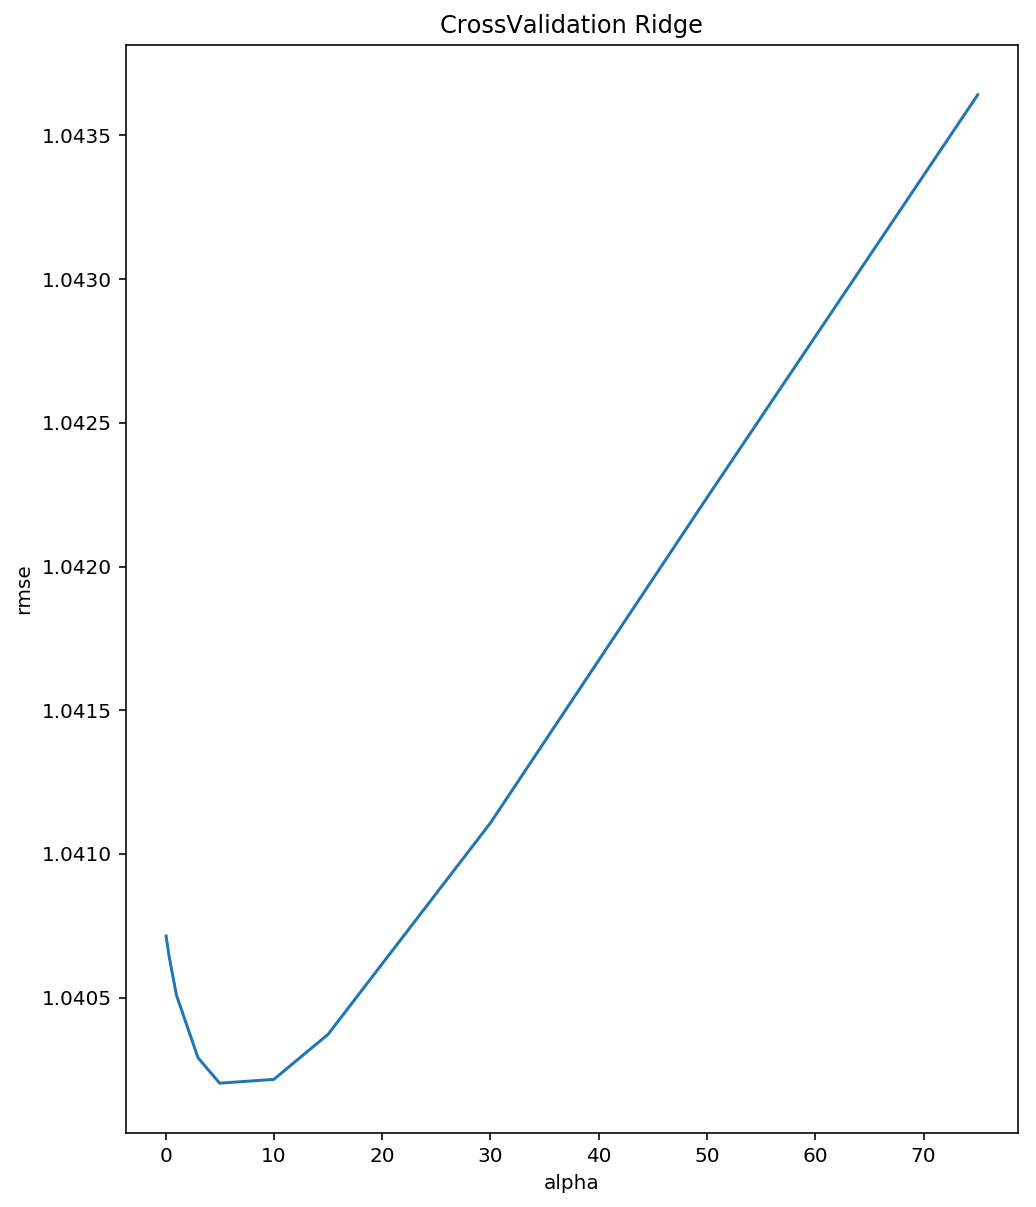

In [295]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

best_alpha = cv_ridge.idxmin()
best_rmse = cv_ridge.min()

cv_ridge.plot(title = "CrossValidation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

print("Melhor alfa: ", best_alpha)
print("Melhor RMSE:", best_rmse)

#### Melhor Ridge

In [296]:
b_rid = Ridge(alpha = best_alpha)
b_rid.fit(X_train_06_10, Y_train_06_10)

b_rid_score = b_rid.score(X_test_06_10, Y_test_06_10)

print("Score Melhor Ridge: ", b_rid_score)

Score Melhor Ridge:  0.7162795833744304


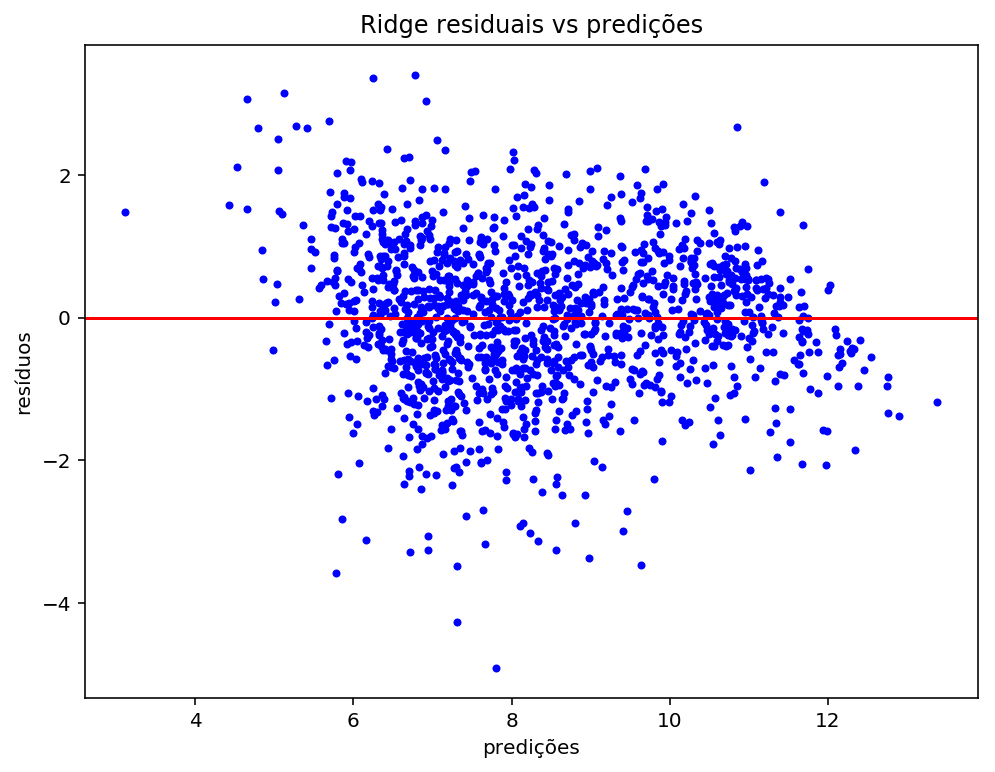

In [297]:
plot_res_vs_pred(X_test_06_10, Y_test_06_10, b_rid, 'Ridge residuais vs predições')

### Lasso

In [298]:
alphas = [1, 0.1, 0.001, 0.0005]
cv_lasso = [rmse_cv(linear_model.Lasso(alpha = alpha, max_iter = 10000)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)

Melhor alfa:  0.0005
Melhor RMSE: 1.0399844213766374


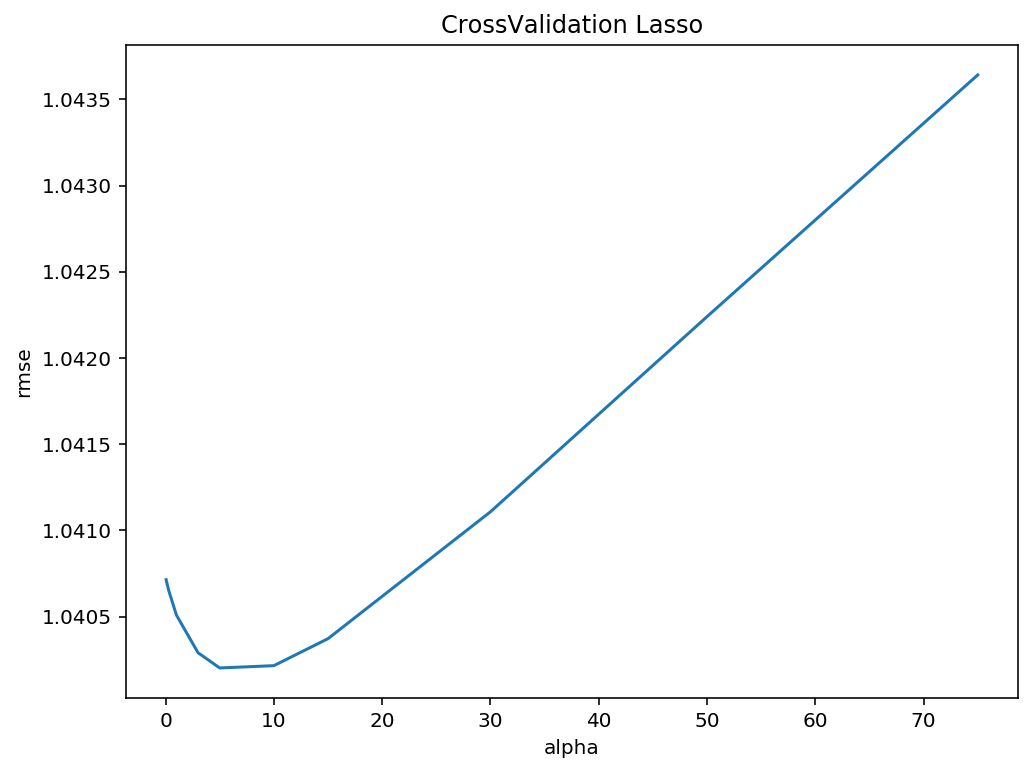

In [299]:
best_alpha_l = cv_lasso.idxmin()
best_rmse_l = cv_lasso.min()

cv_ridge.plot(title = "CrossValidation Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

print("Melhor alfa: ", best_alpha_l)
print("Melhor RMSE:", best_rmse_l)

In [300]:
lasso = LassoCV(alphas = [best_alpha_l]).fit(X_train_06_10, Y_train_06_10)

score_l = lasso.score(X_test_06_10, Y_test_06_10)

print("RMSE Lasso: ", rmse_cv(lasso).mean())
print("Score Lasso: ", score_l)

RMSE Lasso:  1.040139617567963
Score Lasso:  0.7163194175897315


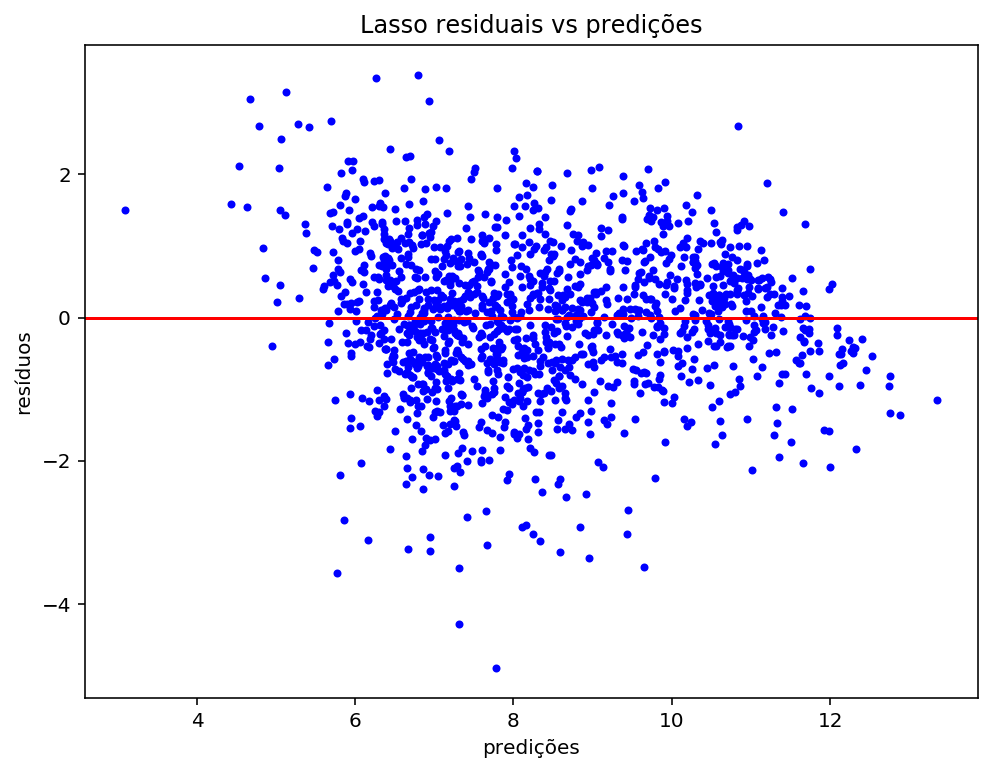

In [314]:
plot_res_vs_pred(X_test_06_10, Y_test_06_10, lasso, 'Lasso residuais vs predições')

In [302]:
coef = pd.Series(lasso.coef_, index = X_train_06_10.columns)

In [303]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 49 variables and eliminated the other 8 variables


In [304]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

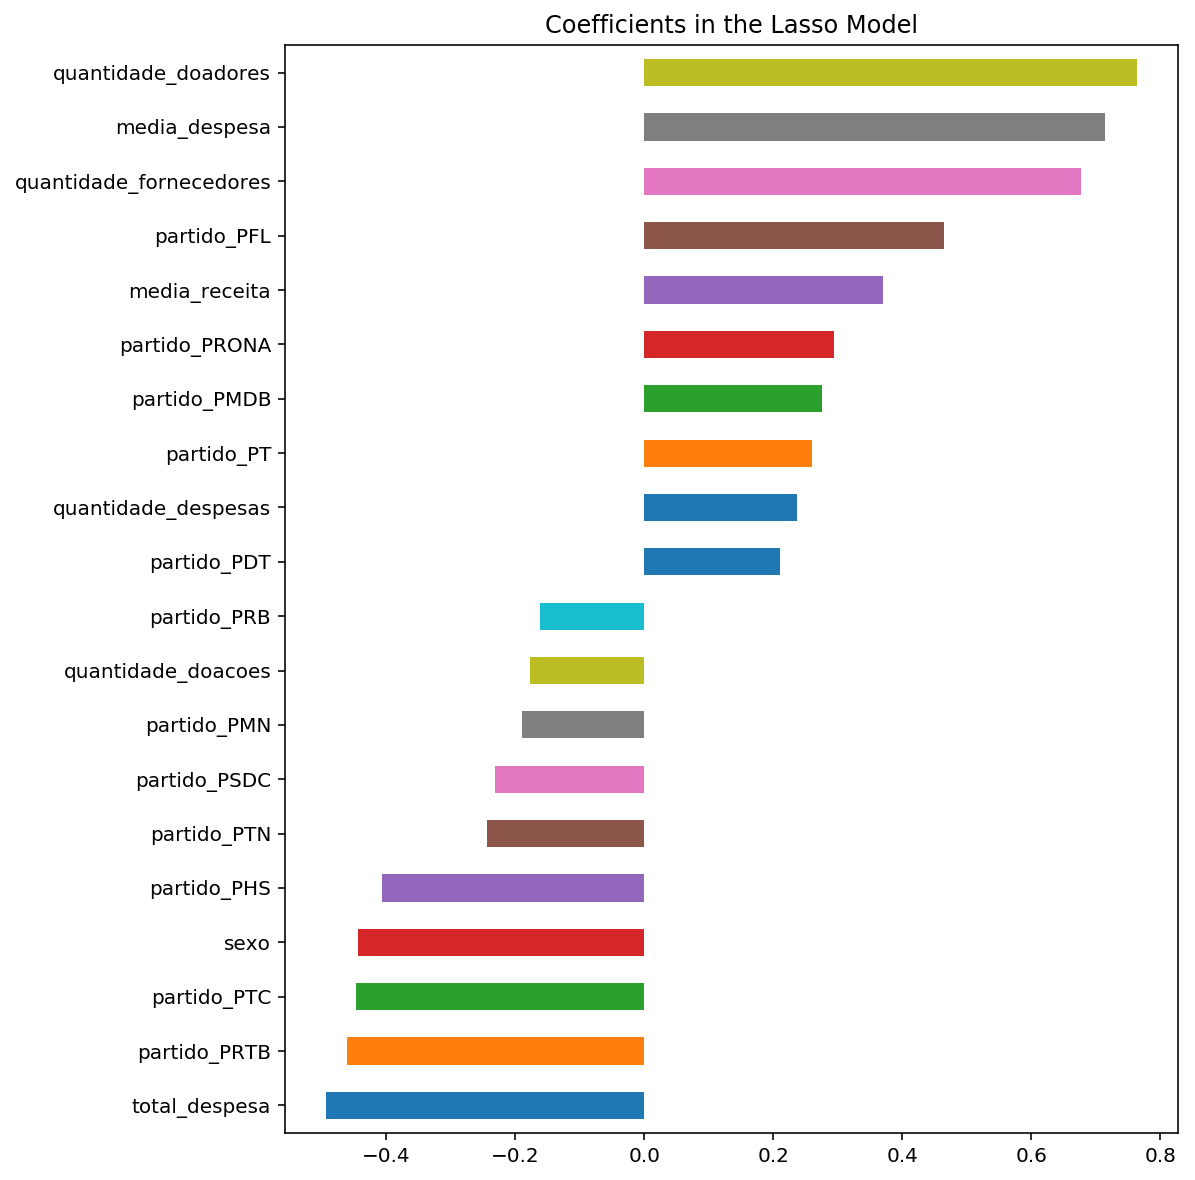

In [305]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### KNN

In [310]:
n = [1, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50]

cv_knn = [rmse_cv(KNeighborsRegressor(n_neighbors = neighbor)).mean() 
            for neighbor in n]

cv_knn = pd.Series(cv_knn, index = n)

Melhor K:  25
Melhor RMSE: 0.9858168565176006


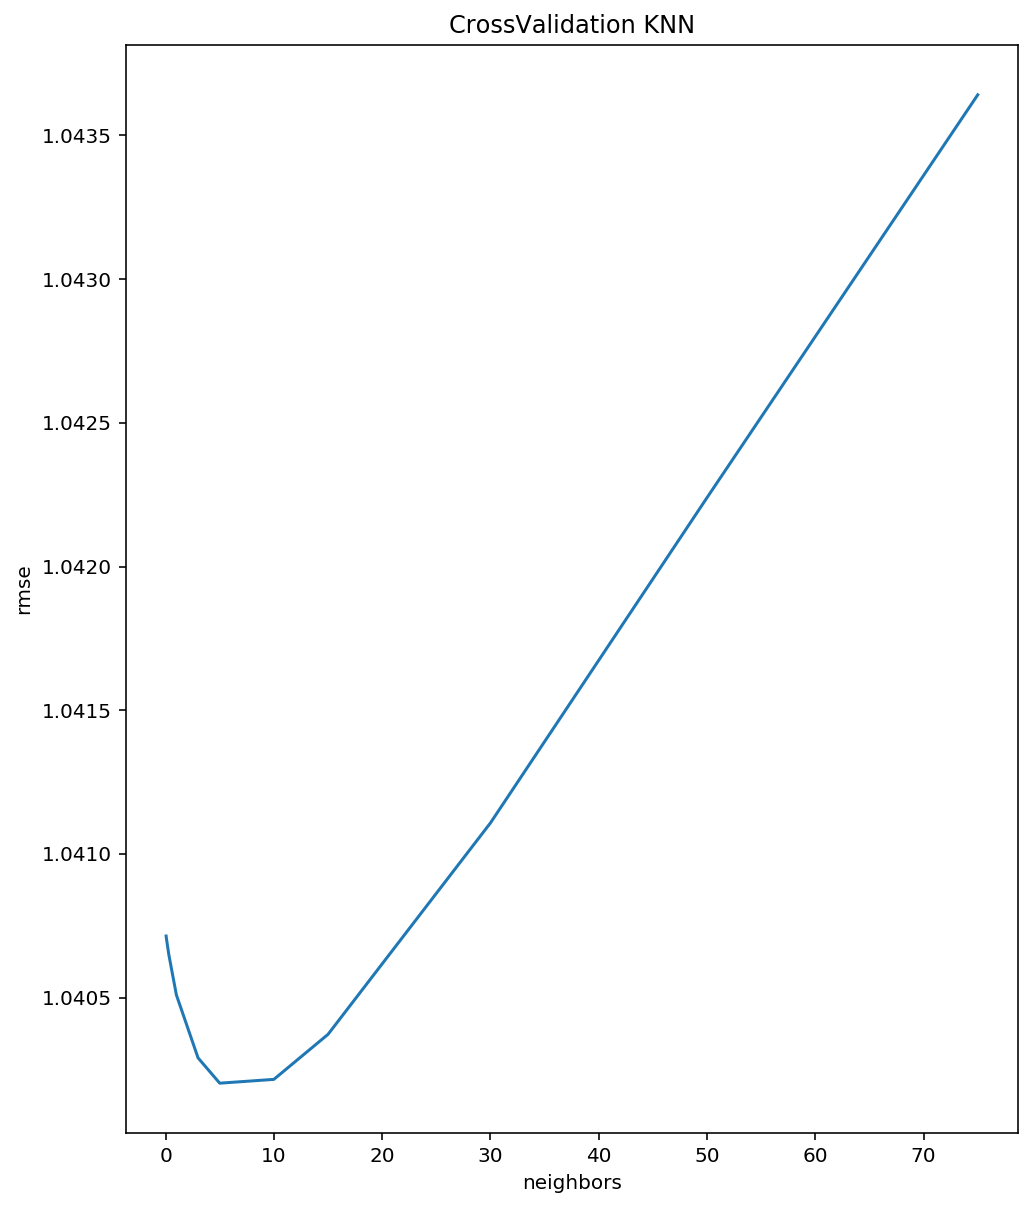

In [311]:
best_k = cv_knn.idxmin()
best_rmse_knn = cv_knn.min()

cv_ridge.plot(title = "CrossValidation KNN")
plt.xlabel("neighbors")
plt.ylabel("rmse")

print("Melhor K: ", best_k)
print("Melhor RMSE:", best_rmse_knn)

In [320]:
best_knn = KNeighborsRegressor(n_neighbors = best_k)
best_knn.fit(X_train_06_10, Y_train_06_10)

score_knn = best_knn.score(X_test_06_10, Y_test_06_10)

print("RMSE Lasso: ", rmse_cv(best_knn).mean())
print("Score KNN: ", score_knn)

RMSE Lasso:  0.9858168565176006
Score KNN:  0.744041373050944


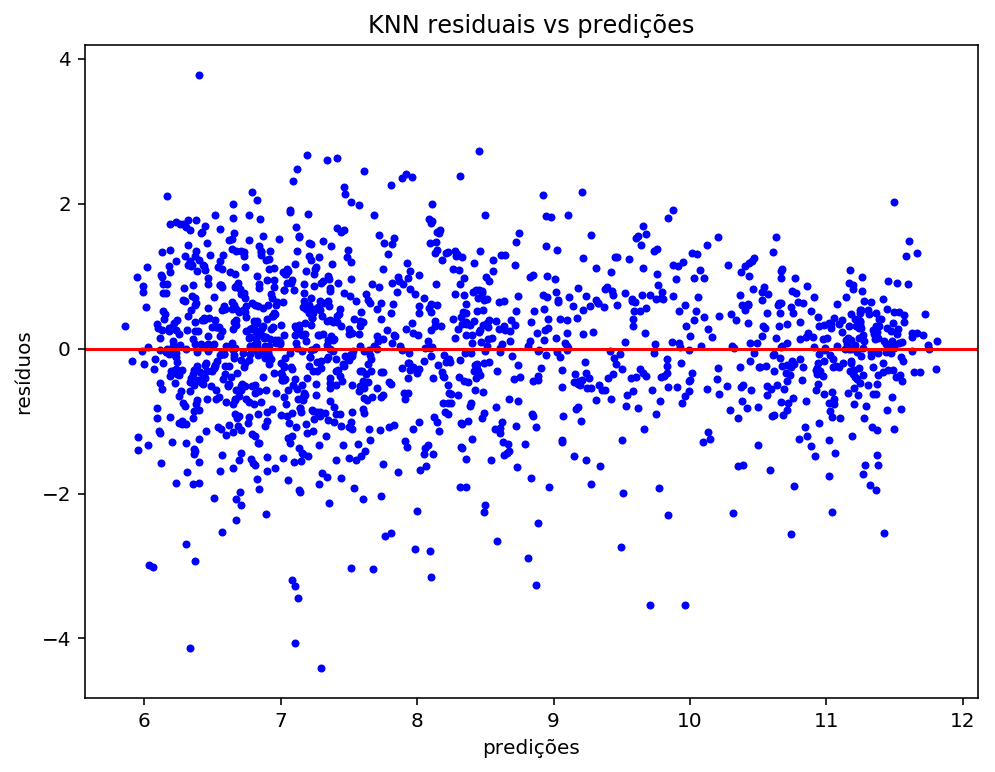

In [321]:
plot_res_vs_pred(X_test_06_10, Y_test_06_10, best_knn, 'KNN residuais vs predições')

### SVR

In [317]:
eps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

cv_svr = [rmse_cv(SVR(epsilon = epsilon)).mean() 
            for epsilon in eps]

cv_svr = pd.Series(cv_svr, index = eps)

Melhor epsilon:  0.1
Melhor RMSE: 0.9665156722648348


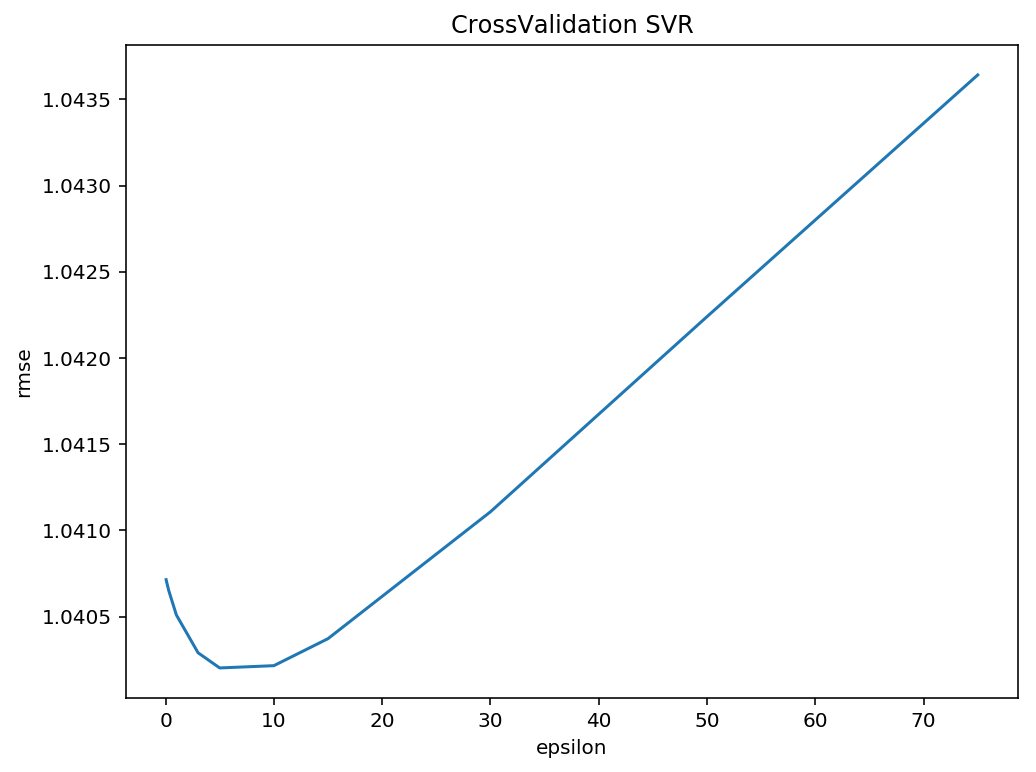

In [325]:
best_eps = cv_svr.idxmin()
best_rmse_svr = cv_svr.min()

cv_ridge.plot(title = "CrossValidation SVR")
plt.xlabel("epsilon")
plt.ylabel("rmse")

print("Melhor epsilon: ", best_eps)
print("Melhor RMSE:", best_rmse_svr)

In [323]:
svr = SVR(epsilon = best_eps)
svr.fit(X_train_06_10, Y_train_06_10)

score_svr = svr.score(X_test_06_10, Y_test_06_10)

print("RMSE SVR: ", rmse_cv(svr).mean())
print("Score SVR: ", score_svr)

RMSE SVR:  0.9665156722648348
Score SVR:  0.7538965865448527


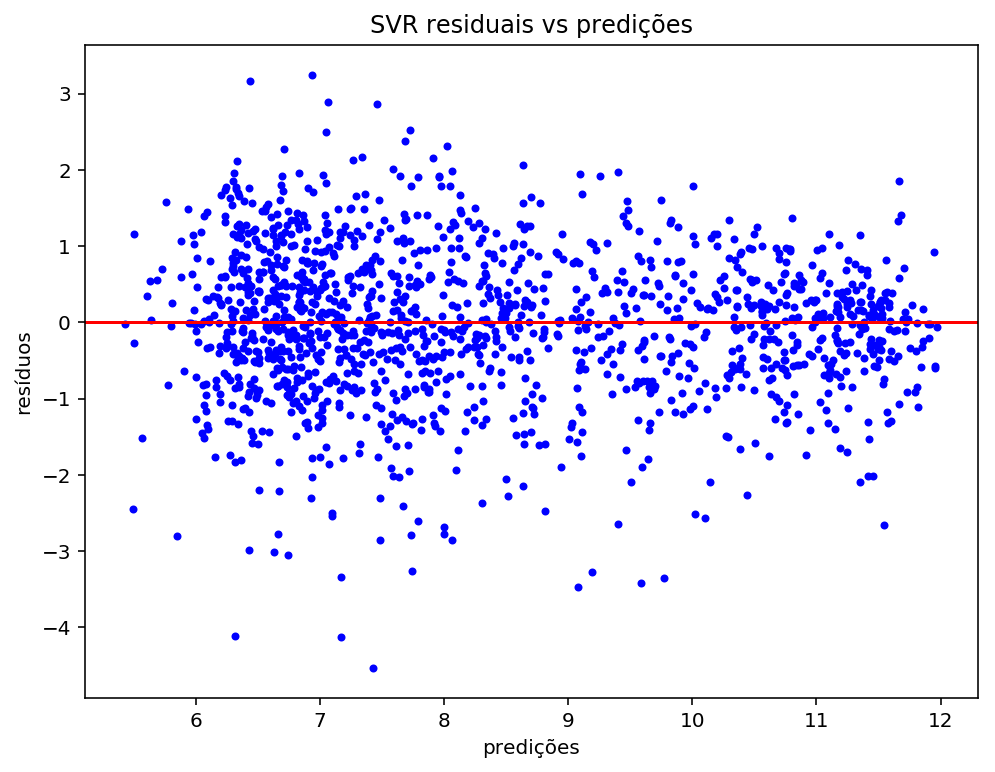

In [324]:
plot_res_vs_pred(X_test_06_10, Y_test_06_10, svr, 'SVR residuais vs predições')

## Dados de 2014

#### Ridge

In [340]:
r_pred = b_rid.predict(X_test_14)

rid_14_score = b_rid.score(X_test_14, Y_test_14)

ridge_rmse = np.sqrt(metrics.mean_squared_error(Y_test_14, r_pred))

print("Score Ridge: ",rid_14_score)
print('RMSE:', ridge_rmse)
print('MAE:', metrics.mean_absolute_error(Y_test_14, r_pred))  
print('MSE:', metrics.mean_squared_error(Y_test_14, r_pred)) 

Score Ridge:  0.4823984770362406
RMSE: 1.838862090546962
MAE: 1.1234540105028195
MSE: 3.3814137880507436


#### Lasso

In [339]:
lasso_pred = lasso.predict(X_test_14)

lasso_14_score = lasso.score(X_test_14, Y_test_14)

lasso_rmse = np.sqrt(metrics.mean_squared_error(Y_test_14, lasso_pred))

print("Score Lasso: ",lasso_14_score)
print('RMSE:', lasso_rmse)
print('MAE:', metrics.mean_absolute_error(Y_test_14, lasso_pred))  
print('MSE:', metrics.mean_squared_error(Y_test_14, lasso_pred)) 

Score Lasso:  0.4822532424882582
RMSE: 1.839120056917977
MAE: 1.1237528470607885
MSE: 3.3823625837579834


#### KNN

In [338]:
k_pred = best_knn.predict(X_test_14)

knn_14_score = best_knn.score(X_test_14, Y_test_14)

knn_rmse = np.sqrt(metrics.mean_squared_error(Y_test_14, k_pred))

print("Score KNN: ",knn_14_score)
print('RMSE:', knn_rmse)
print('MAE:', metrics.mean_absolute_error(Y_test_14, k_pred))  
print('MSE:', metrics.mean_squared_error(Y_test_14, k_pred)) 

Score KNN:  0.46209826625310724
RMSE: 1.8745751643201787
MAE: 1.1385413247305902
MSE: 3.514032046686025


#### SVR

In [337]:
s_pred = svr.predict(X_test_14)

svr_14_score = svr.score(X_test_14, Y_test_14)

svr_rmse =  np.sqrt(metrics.mean_squared_error(Y_test_14, s_pred))

print("Score SVR: ",svr_14_score)
print('RMSE:', svr_rmse)
print('MAE:', metrics.mean_absolute_error(Y_test_14, s_pred))  
print('RMSE:', metrics.mean_squared_error(Y_test_14, s_pred)) 

Score SVR:  0.48331884725274266
RMSE: 1.8372264820307105
MAE: 1.0991117335055895
RMSE: 3.3754011462749403


# Resultados

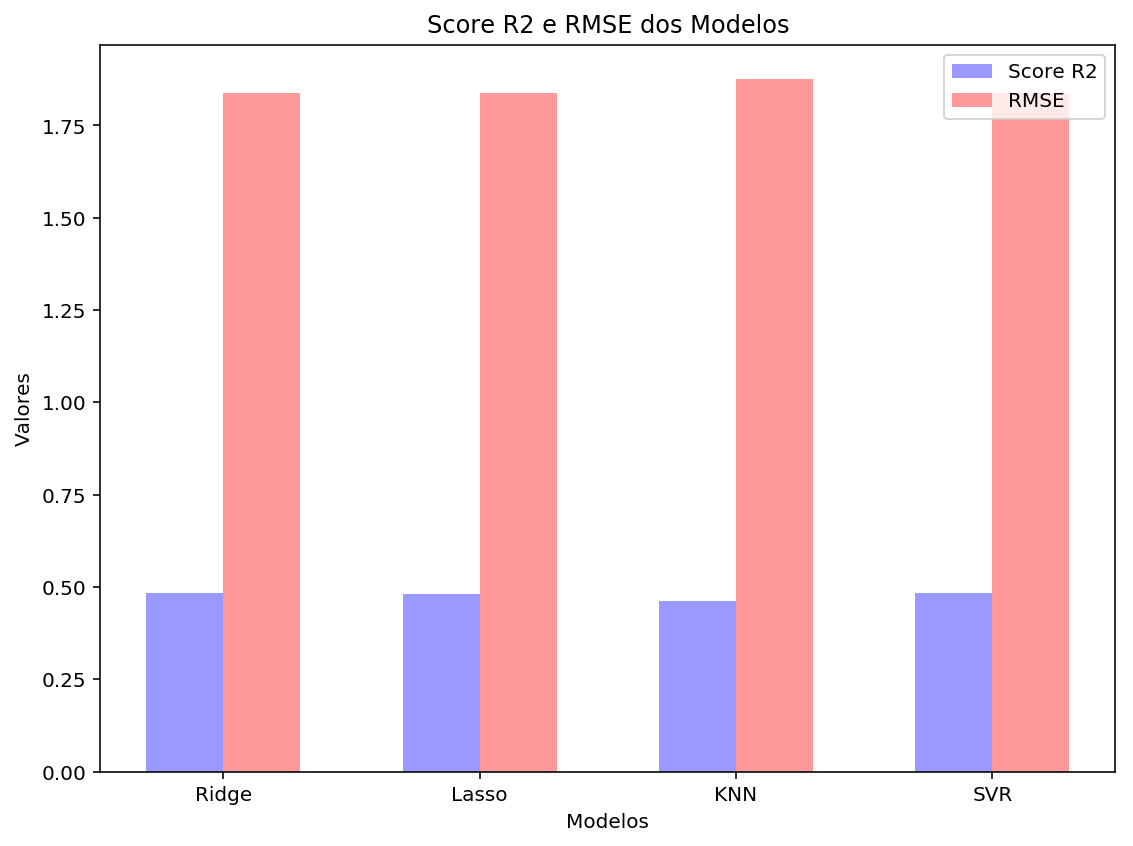

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

score = (rid_14_score,lasso_14_score, knn_14_score, svr_14_score)

rmse = (ridge_rmse,lasso_rmse,knn_rmse,svr_rmse)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, score, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Score R2')

rects2 = ax.bar(index + bar_width, rmse, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='RMSE')

ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Score R2 e RMSE dos Modelos')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Ridge', 'Lasso', 'KNN', 'SVR'))
ax.legend()

fig.tight_layout()
plt.show()

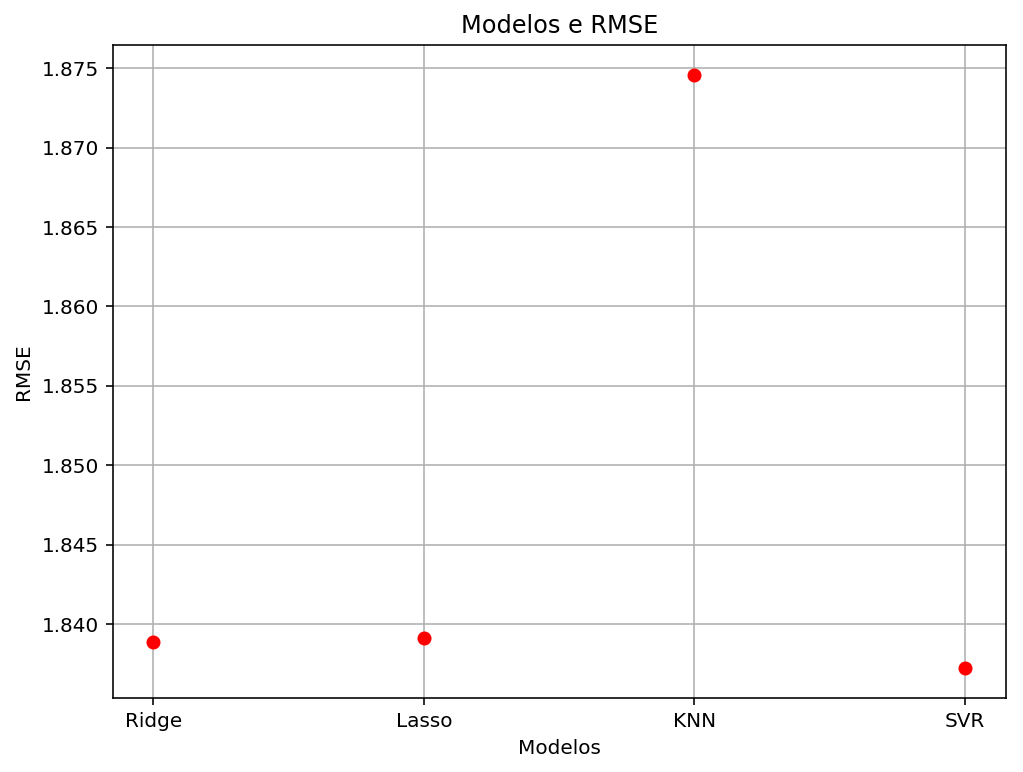

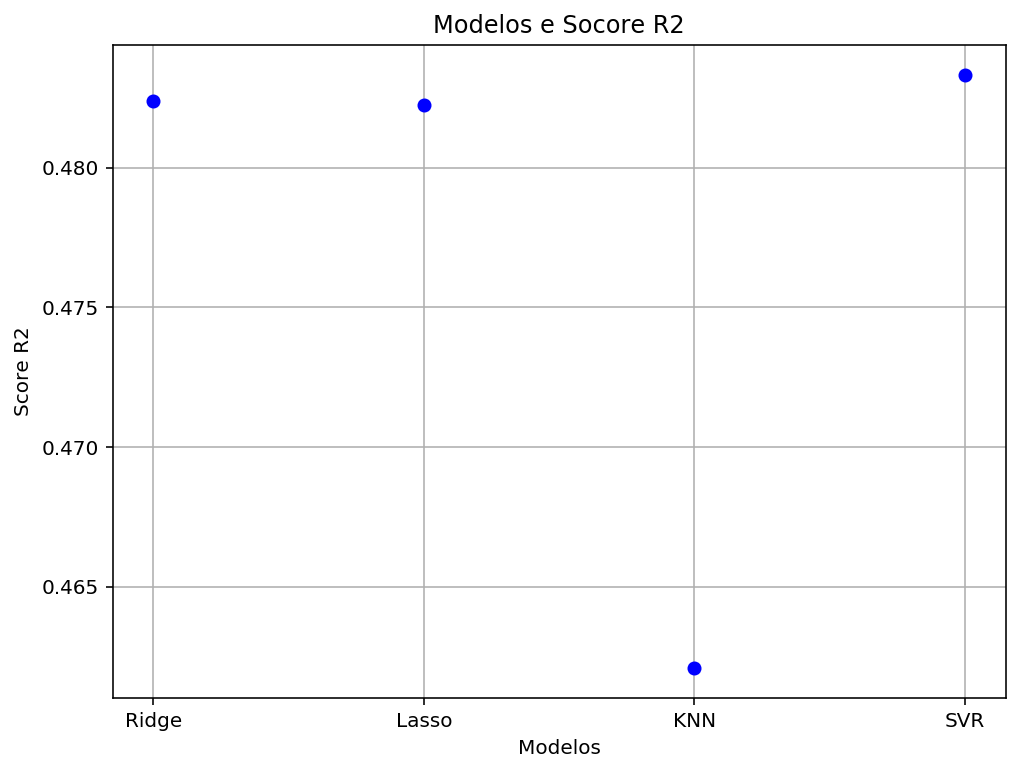

In [375]:
plt.plot(["Ridge","Lasso","KNN", "SVR"], 
         [ridge_rmse,lasso_rmse,knn_rmse,svr_rmse], 
         'ro', color="r")
plt.grid(True)
plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.title("Modelos e RMSE")
plt.show()

plt.plot(["Ridge","Lasso","KNN", "SVR"], 
         [rid_14_score,lasso_14_score, knn_14_score, svr_14_score], 
         'ro', color="b")
plt.grid(True)
plt.xlabel("Modelos")
plt.ylabel("Score R2")
plt.title("Modelos e Socore R2")
plt.show()



#### Menor RMSE e maior R² = SVR

#### Mario RMSE e menor R² = KNN